In [1]:
install.packages('DT')
install.packages("bigrquery")

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘rapidjsonr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages("plotly")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(DBI)
library(stringr)
library(DT)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [4]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra" ,
  dataset = "mart_gtfs" #,
#  billing = "billing"
  )

#### Reading in the Bus file

In [7]:
Bus1 =  read_csv("../fs_kit/data/Bus1.csv") %>% 
    mutate(Bus = as.character(Bus))
head(Bus1)

Rows: 55 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): Bus, deviceSerialNumber

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Bus,deviceSerialNumber
<chr>,<dbl>
5501,7805833
5121,7805871
5120,7805872
5119,7805870
5118,7805873
5117,7805869


#### Reading in the November XML file

In [8]:
SolTransNov = read_csv("../fs_kit/data/20241100009.000000.csv", col_select = c(
  operatorId,
  deviceSerialNumber,
  routeId,
  PST,
  recordType,
  fareTransactionSubType,
  contractId,
  productCategory,
  purseAmount,
  purseBalance,
  fareCategory,
  transferOperator,
  transferDiscountFlag,
  fareDiscount,
  deviceEventTransactionSubType,
  eventCode1,
  eventCode16,
  Description,
  routeId29)
)

Rows: 90821 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): PST, Description
dbl (17): operatorId, deviceSerialNumber, routeId, recordType, fareTransacti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
head(SolTransNov)

operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,fareCategory,transferOperator,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
9,7806110,771,10/16/2024 8:51,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,16,NA,29,NA,NA
9,7806110,771,10/16/2024 8:51,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,16,NA,18,NA,NA
9,7806110,771,10/16/2024 8:51,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,NA,NA,NA
9,7806112,771,10/22/2024 13:44,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1,NA,NA,NA
9,7806454,0,10/23/2024 6:08,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,16,NA,5,NA,0
9,7806454,834,10/23/2024 6:08,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,16,NA,5,NA,834


In [10]:
SolTransNov = SolTransNov %>% 
    mutate(PST = mdy_hm(PST), 
           Date = as.Date(PST),
           Time = format(PST, format = "%H:%M:%S")) %>% 
     filter(operatorId == 9,
           Date >= "2024-11-01",
           deviceSerialNumber > 7805802,
           deviceSerialNumber < 7805874)
head(SolTransNov)

operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,⋯,transferOperator,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29,Date,Time
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>
9,7805822,420,2024-11-01 00:01:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,16,NA,22,EV_CD_PACKAGE_RECEIVED,NA,2024-11-01,00:01:00
9,7805822,420,2024-11-01 00:01:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,1,21,NA,EV_CONFIG_DATA_CHANGE,NA,2024-11-01,00:01:00
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,16,NA,29,EV_CD_DOWNLOAD_STATUS,NA,2024-11-01,02:07:00
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,16,NA,18,EV_APP_VERSIONS,NA,2024-11-01,02:07:00
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:07:00
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,16,NA,22,EV_CD_PACKAGE_RECEIVED,NA,2024-11-01,02:07:00


In [11]:
dim(SolTransNov)

[1] 43205    21

In [12]:
X = SolTransNov

In [13]:
SolTransNov = SolTransNov %>% 
    inner_join(Bus1) 
dim(SolTransNov)

Joining with `by = join_by(deviceSerialNumber)`


[1] 43205    22

#### Reading in the December XML file

Since some of the transactions from Novemeber have been finalized in Decemeber (one month delay!), I had to download the December file also.

In [14]:
SolTransDec = read_csv("../fs_kit/data/20241200009.000000.csv", col_select = c(
  operatorId,
  deviceSerialNumber,
  routeId,
  PST,
  recordType,
  fareTransactionSubType,
  contractId,
  productCategory,
  purseAmount,
  purseBalance,
  fareCategory,
  transferOperator,
  transferDiscountFlag,
  fareDiscount,
  deviceEventTransactionSubType,
  eventCode1 = eventCode,
  eventCode16 = eventCode17,
  Description = 0,
  routeId29 = routeId18)
)
SolTransDec = SolTransDec %>% 
    mutate(Description = NA) %>% 
    select( 
  operatorId,
  deviceSerialNumber,
  routeId,
  PST,
  recordType,
  fareTransactionSubType,
  contractId,
  productCategory,
  purseAmount,
  purseBalance,
  fareCategory,
  transferOperator,
  transferDiscountFlag,
  fareDiscount,
  deviceEventTransactionSubType,
  eventCode1,
  eventCode16,
  Description,
  routeId29)

Rows: 88542 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): PST
dbl (17): operatorId, deviceSerialNumber, routeId, recordType, fareTransacti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
head(SolTransDec)

operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,fareCategory,transferOperator,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
9,7805846,835,11/30/2024 9:02,1,1,0,1,200,370,0,0,0,NA,NA,NA,NA,NA,NA
9,7805846,781,12/1/2024 9:03,1,1,0,1,500,2023,0,0,0,NA,NA,NA,NA,NA,NA
9,7805846,781,12/1/2024 11:43,1,1,0,1,500,1523,0,0,0,NA,NA,NA,NA,NA,NA
9,7805818,781,11/30/2024 10:24,1,1,0,1,250,1625,1,4,0,NA,NA,NA,NA,NA,NA
9,7805846,781,12/1/2024 10:14,1,1,0,1,250,12945,1,0,0,NA,NA,NA,NA,NA,NA
9,7805694,770,12/1/2024 12:17,1,1,0,1,200,1150,0,0,0,NA,NA,NA,NA,NA,NA


In [16]:
SolTransDec = SolTransDec %>% 
    mutate(PST = mdy_hm(PST), 
           Date = as.Date(PST),
           Time = format(PST, format = "%H:%M:%S")) %>% 
     filter(operatorId == 9,
           Date >= "2024-11-01",
           Date <= "2024-11-30",
           deviceSerialNumber > 7805802,
           deviceSerialNumber < 7805874) %>% 
    inner_join(Bus1)
head(SolTransNov)

Joining with `by = join_by(deviceSerialNumber)`


operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,⋯,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29,Date,Time,Bus
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>
9,7805822,420,2024-11-01 00:01:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,22,EV_CD_PACKAGE_RECEIVED,NA,2024-11-01,00:01:00,3912
9,7805822,420,2024-11-01 00:01:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,21,NA,EV_CONFIG_DATA_CHANGE,NA,2024-11-01,00:01:00,3912
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,29,EV_CD_DOWNLOAD_STATUS,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,18,EV_APP_VERSIONS,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,22,EV_CD_PACKAGE_RECEIVED,NA,2024-11-01,02:07:00,5105


In [17]:
Nov = SolTransNov %>% 
    rbind(SolTransDec)

In [18]:
head(Nov)

operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,⋯,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29,Date,Time,Bus
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>
9,7805822,420,2024-11-01 00:01:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,22,EV_CD_PACKAGE_RECEIVED,NA,2024-11-01,00:01:00,3912
9,7805822,420,2024-11-01 00:01:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,21,NA,EV_CONFIG_DATA_CHANGE,NA,2024-11-01,00:01:00,3912
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,29,EV_CD_DOWNLOAD_STATUS,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,18,EV_APP_VERSIONS,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,22,EV_CD_PACKAGE_RECEIVED,NA,2024-11-01,02:07:00,5105


In [19]:
Nov = Nov %>% 
        mutate(Description = ifelse(Nov$recordType == 6 &
                                    Nov$deviceEventTransactionSubType == 16 &
                                    Nov$eventCode16 == 5 &
                                    is.na(Nov$Description), "EV_ROUTE_CHANGE", 
                                        ifelse(Nov$recordType == 6 &
                                            Nov$deviceEventTransactionSubType == 1 &
                                            Nov$eventCode1 == 0 &
                                            is.na(Nov$Description), "EV_IN_SERVICE",
                                                ifelse(Nov$recordType == 6 &
                                                    Nov$deviceEventTransactionSubType == 1 &
                                                    Nov$eventCode1 == 1 &
                                                    is.na(Nov$Description), "EV_OUT_OF_SERVICE",
                                    Description))))

In [20]:
Nov %>% 
    filter(Nov$recordType == 6,
           Nov$deviceEventTransactionSubType == 1,
           Nov$eventCode1 == 1,
           is.na(Nov$Description)) %>% 
    head()

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,⋯,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29,Date,Time,Bus
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>


In [21]:
Nov %>% 
    filter(Nov$recordType == 6,
           Nov$deviceEventTransactionSubType == 1,
           Nov$eventCode1 == 1,
           is.na(Nov$Description)) %>% 
    head()

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,⋯,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29,Date,Time,Bus
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>


In [22]:
Nov %>% 
    dim()

[1] 44304    22

In [23]:
Nov1 = Nov %>% 
    filter(recordType == 1 |
           (recordType == 6 &
            ((deviceEventTransactionSubType == 16 &
              eventCode16 == 5) |
             (deviceEventTransactionSubType == 1 &
              (eventCode1 == 0 |
               eventCode1 == 1)
             )
            )
           )
          ) 

In [24]:
Nov1 %>% head()
Nov1 %>% dim()

operatorId,deviceSerialNumber,routeId,PST,recordType,fareTransactionSubType,contractId,productCategory,purseAmount,purseBalance,⋯,transferDiscountFlag,fareDiscount,deviceEventTransactionSubType,eventCode1,eventCode16,Description,routeId29,Date,Time,Bus
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:07:00,5105
9,7805818,835,2024-11-01 02:07:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:07:00,5105
9,7805825,835,2024-11-01 02:13:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:13:00,3916
9,7805832,835,2024-11-01 02:13:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:13:00,5056
9,7805807,835,2024-11-01 02:15:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:15:00,3904
9,7805853,835,2024-11-01 02:15:00,6,NA,NA,NA,NA,NA,⋯,NA,NA,1,0,NA,EV_IN_SERVICE,NA,2024-11-01,02:15:00,5054


[1] 34526    22

In [25]:
Nov1 = Nov1 %>% 
    anti_join(Nov1 %>% 
                  filter((Description == "EV_ROUTE_CHANGE" & 
                          routeId29 == 835)))

Joining with `by = join_by(operatorId, deviceSerialNumber, routeId, PST,
recordType, fareTransactionSubType, contractId, productCategory, purseAmount,
purseBalance, fareCategory, transferOperator, transferDiscountFlag,
fareDiscount, deviceEventTransactionSubType, eventCode1, eventCode16,
Description, routeId29, Date, Time, Bus)`


In [26]:
Nov1 %>% dim()

[1] 33500    22

In [27]:
Nov1 = Nov1 %>% 
    anti_join(Nov1  %>% 
    filter(recordType == 1 &
           routeId != 835)) 
dim(Nov1)

Joining with `by = join_by(operatorId, deviceSerialNumber, routeId, PST,
recordType, fareTransactionSubType, contractId, productCategory, purseAmount,
purseBalance, fareCategory, transferOperator, transferDiscountFlag,
fareDiscount, deviceEventTransactionSubType, eventCode1, eventCode16,
Description, routeId29, Date, Time, Bus)`


[1] 14175    22

In [28]:
Nov1 = Nov1 %>% 
    select(deviceSerialNumber, PST, recordType, Description, Date)

In [29]:
Nov2 = Nov1 %>% 
    group_by(deviceSerialNumber, Date) %>% 
    mutate(Lead = lead(recordType, order_by = PST, default = 6), Lag = lag(recordType, order_by = PST, default = 6))  %>% 
    arrange(deviceSerialNumber, PST) %>% 
    filter(recordType != 1,
           Lead != Lag) %>% 
    mutate(PSTLead = lead(PST, order_by = PST)) %>% 
    filter(!is.na(PSTLead)) %>%  
    mutate(delay = difftime(PSTLead, PST, units = "min")) 
Nov2 %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 20, dom = 'tp'),
              caption = ''
             )



HTML widgets cannot be represented in plain text (need html)

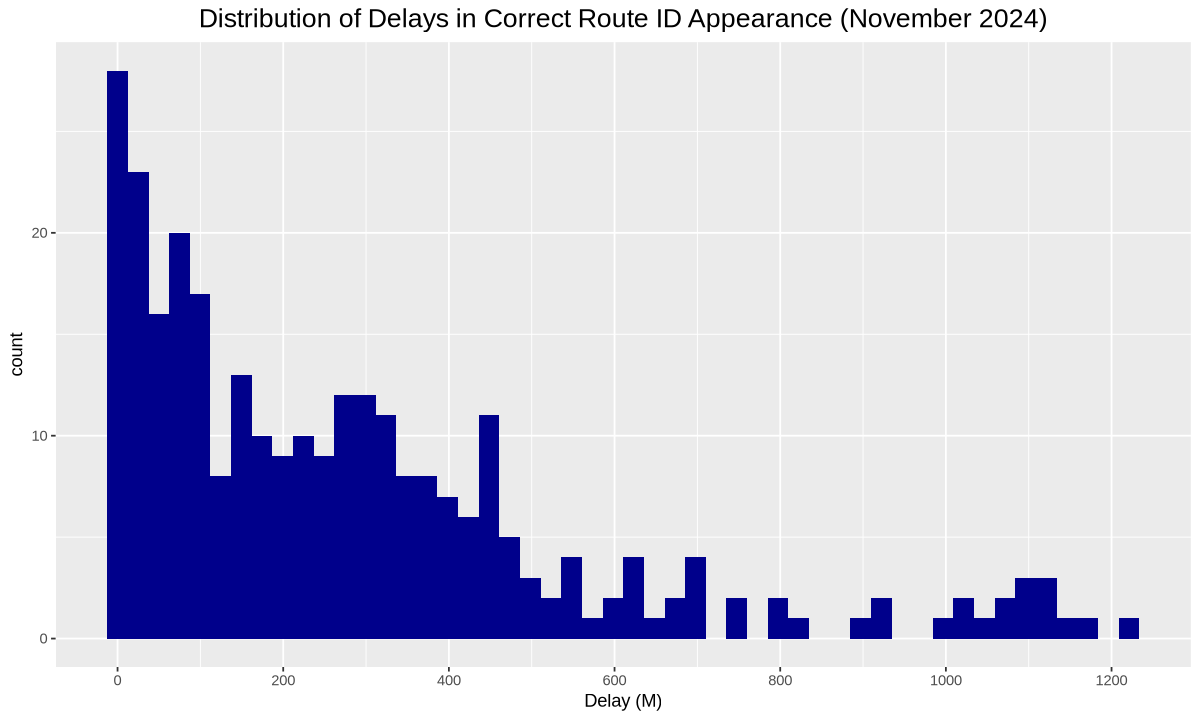

In [30]:
options(repr.plot.width = 10, repr.plot.height =6) 
Nov2 %>% 
    ggplot(aes(as.numeric(delay))) +
    geom_histogram(bins = 50, fill = 'darkblue') +
    ggtitle("Distribution of Delays in Correct Route ID Appearance (November 2024)") +
    theme(plot.title = element_text(hjust = 0.5, size = 16)) +
    xlab("Delay (M)") +
    scale_x_continuous(breaks = seq(0, 1200, by =200)) 

              

In [31]:
summary(as.numeric(Nov2$delay))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    69.0   216.0   281.4   391.0  1222.0 